In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df['gender_int'] = df['sex'].map({'male':1,'female':0})

In [7]:
df['smoker_int'] = df['smoker'].map({'yes':1,'no':0})

In [8]:
df.pop('sex')

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [9]:
df.pop('smoker')

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [10]:
df.pop('region')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

<Axes: xlabel='charges', ylabel='Count'>

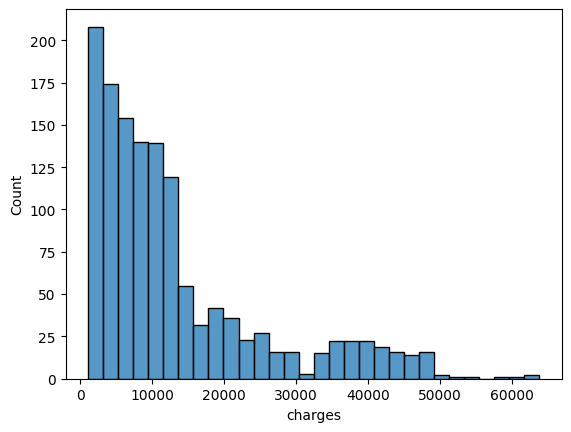

In [11]:
sns.histplot(data=df, x='charges')

In [12]:
df['charges_log'] = np.log(df['charges'])

<Axes: xlabel='charges_log', ylabel='Count'>

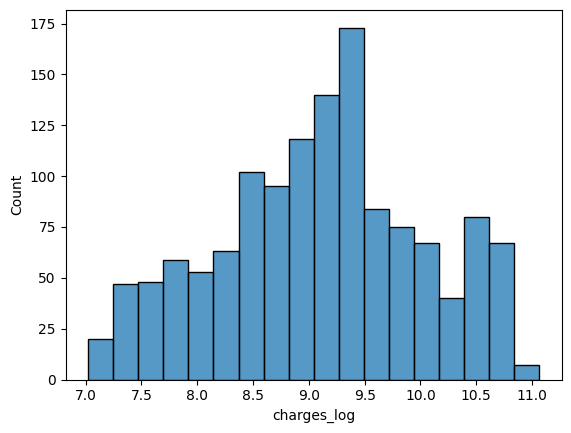

In [13]:
sns.histplot(data=df, x='charges_log')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   bmi          1338 non-null   float64
 2   children     1338 non-null   int64  
 3   charges      1338 non-null   float64
 4   gender_int   1338 non-null   int64  
 5   smoker_int   1338 non-null   int64  
 6   charges_log  1338 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 73.3 KB


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
X = df.drop('charges',axis=1)
y = df['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train= scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(936, 6)

In [23]:
X_test.shape

(402, 6)

# Creating a model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [25]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [26]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=4,epochs=500)

Epoch 1/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 309801376.0000 - val_loss: 303325248.0000
Epoch 2/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 300390304.0000 - val_loss: 240050608.0000
Epoch 3/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 211613216.0000 - val_loss: 99596624.0000
Epoch 4/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 101743536.0000 - val_loss: 92187344.0000
Epoch 5/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 97691136.0000 - val_loss: 86366392.0000
Epoch 6/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 87447504.0000 - val_loss: 80822128.0000
Epoch 7/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 70898696.0000 - val_loss: 76054440.0000
Epoch 8/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76095808.0000 - val_loss: 70158536.0000
Epoch 9/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 71112928.0000 - val_loss: 64814116.0000
Epoch 10/500
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 64722268.0000 - val_los

In [27]:
losses = pd.DataFrame(model.history.history)

<Axes: >

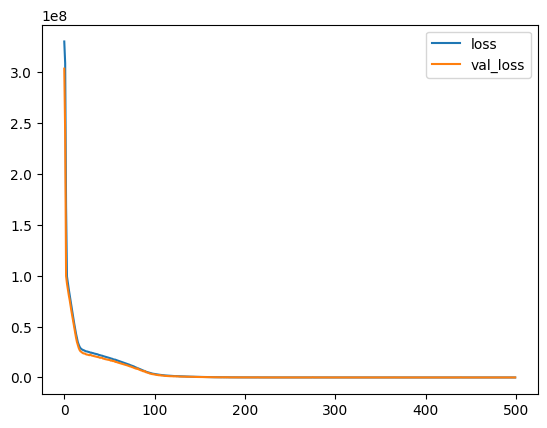

In [28]:
losses.plot()

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [30]:
predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [31]:
mean_absolute_error(y_test,predictions)

96.58466541054494

In [32]:
np.sqrt(mean_squared_error(y_test,predictions))

164.54252909783239

In [33]:
explained_variance_score(y_test,predictions)

0.9998209791403959

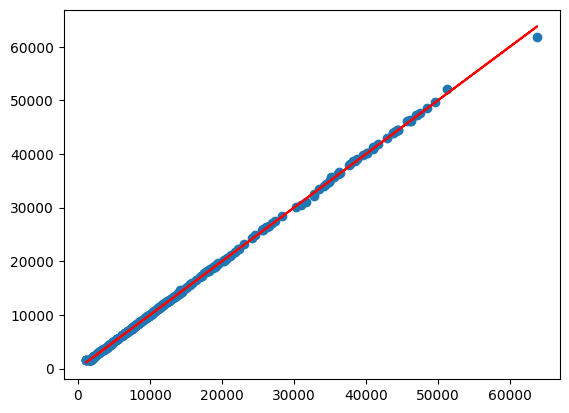

In [34]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')